In [1]:
import pandas as pd
from plotnine import *

In [2]:
df = pd.read_csv('state_county_death.csv')

In [3]:
df

,STATE,COUNTY,YEAR,POP,TotalOverdose,OverdoseProp,PolicyState,Post
0,Alabama,Autauga County,2003,46800,10.0,0.000214,False,False
1,Alabama,Autauga County,2004,48366,10.0,0.000207,False,False
2,Alabama,Autauga County,2005,49676,10.0,0.000201,False,False
3,Alabama,Autauga County,2006,51328,10.0,0.000195,False,False
4,Alabama,Autauga County,2007,52405,10.0,0.000191,False,False
...,...,...,...,...,...,...,...,...
40828,Wyoming,Weston County,2011,7142,10.0,0.001400,False,False
40829,Wyoming,Weston County,2012,7077,10.0,0.001413,False,False
40830,Wyoming,Weston County,2013,7136,10.0,0.001401,False,False
40831,Wyoming,Weston County,2014,7138,10.0,0.001401,False,False


In [4]:
data = df.copy()
data['YearDiff_FL'] = data['YEAR'] - 2010
data['YearDiff_TX'] = data['YEAR'] - 2007
data['YearDiff_WA'] = data['YEAR'] - 2012
len(data[data['STATE'] == 'Texas']['COUNTY'].unique())

254

# Texas cleaning

In [5]:
data[data['STATE'] == 'Texas'].sort_values(by = 'OverdoseProp', ascending = False)

,STATE,COUNTY,YEAR,POP,TotalOverdose,OverdoseProp,PolicyState,Post,YearDiff_FL,YearDiff_TX,YearDiff_WA
34737,Texas,Loving County,2004,55,1.0,0.018182,True,False,-6,-3,-8
34741,Texas,Loving County,2008,61,1.0,0.016393,True,True,-2,1,-4
34738,Texas,Loving County,2005,70,1.0,0.014286,True,False,-5,-2,-7
34736,Texas,Loving County,2003,72,1.0,0.013889,True,False,-7,-4,-9
34739,Texas,Loving County,2006,75,1.0,0.013333,True,False,-4,-1,-6
...,...,...,...,...,...,...,...,...,...,...,...
34184,Texas,Hidalgo County,2010,774769,14.0,0.000018,True,True,0,3,-2
34178,Texas,Hidalgo County,2004,653779,11.0,0.000017,True,False,-6,-3,-8
34177,Texas,Hidalgo County,2003,632475,10.0,0.000016,True,False,-7,-4,-9
34179,Texas,Hidalgo County,2005,674982,10.0,0.000015,True,False,-5,-2,-7


In [6]:
TXmean = data[(data['STATE'] == 'Texas') & (data['POP'] > 4000)]['OverdoseProp'].mean()
TXmean

0.0006077023776987722

In [7]:
TXcounties = data[(data['STATE'] == 'Texas') & (data['POP'] <= 4000)]['COUNTY'].unique()
data.loc[data['COUNTY'].isin(TXcounties), "OverdoseProp" ] = TXmean

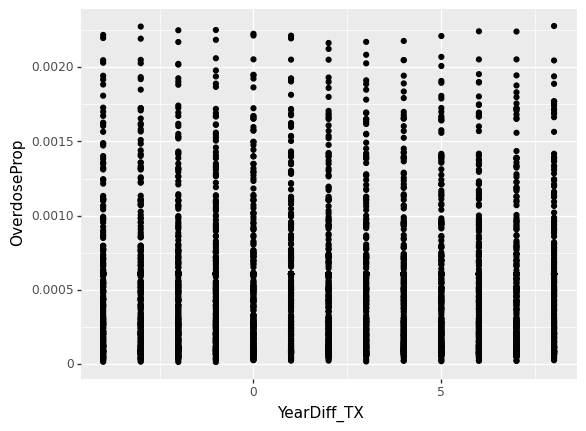

<ggplot: (165981503275)>

In [8]:
(ggplot(data[data['STATE'] == 'Texas'], aes(x = 'YearDiff_TX', y='OverdoseProp')) +
        geom_point()
)

In [9]:
# TX - Jan 2007
# ['AR', 'NM', 'KS']
nearTX = data[data['STATE'].isin(['Arkansas', 'New Mexico', 'Kansas'])].copy()
nearTX['STATE'] = "NearbyStates"
nearTX.sort_values(by = 'OverdoseProp', ascending = False).head(500)

,STATE,COUNTY,YEAR,POP,TotalOverdose,OverdoseProp,PolicyState,Post,YearDiff_FL,YearDiff_TX,YearDiff_WA
11992,NearbyStates,Greeley County,2009,1210,10.0,0.008264,False,True,-1,2,-3
11991,NearbyStates,Greeley County,2008,1247,10.0,0.008019,False,True,-2,1,-4
11993,NearbyStates,Greeley County,2010,1247,10.0,0.008019,False,True,0,3,-2
11994,NearbyStates,Greeley County,2011,1255,10.0,0.007968,False,True,1,4,-1
11989,NearbyStates,Greeley County,2006,1262,10.0,0.007924,False,False,-4,-1,-6
...,...,...,...,...,...,...,...,...,...,...,...
23487,NearbyStates,Hidalgo County,2012,4780,10.0,0.002092,False,True,2,5,0
23564,NearbyStates,Mora County,2011,4781,10.0,0.002092,False,True,1,4,-1
12642,NearbyStates,Scott County,2009,4823,10.0,0.002073,False,True,-1,2,-3
11582,NearbyStates,Barber County,2015,4824,10.0,0.002073,False,True,5,8,3


In [10]:
nearTXmean = nearTX[nearTX['POP'] > 5000]['OverdoseProp'].mean()
nearTXmean

0.0006496680401258613

In [11]:
nearTXcounties = nearTX[nearTX['POP'] <= 5000]['COUNTY'].unique()
nearTX.loc[nearTX['COUNTY'].isin(nearTXcounties), "OverdoseProp" ] = nearTXmean

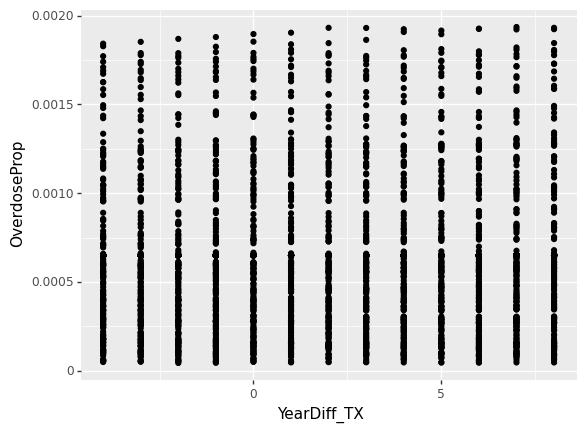

<ggplot: (165981769599)>

In [12]:
(ggplot(nearTX, aes(x = 'YearDiff_TX', y='OverdoseProp')) +
        geom_point()
)

In [13]:
mergedTX = data[data['STATE'] == 'Texas'].append(nearTX, ignore_index = True)

## Pre-post Analysis

### Florida

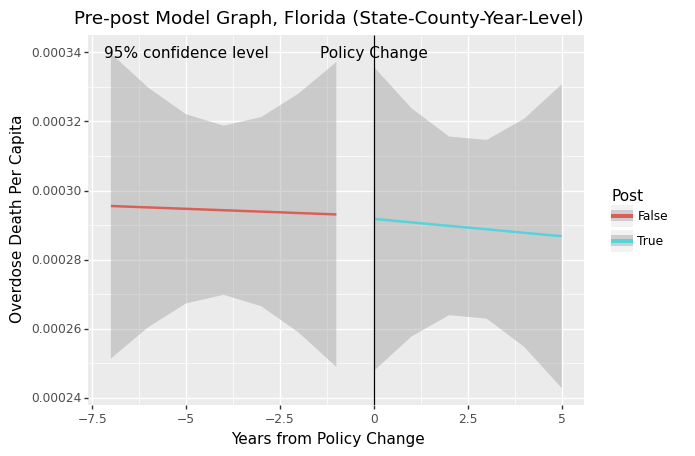

<ggplot: (165983274442)>

In [14]:
# FL - Feb 2010
pre_FL = (ggplot(data[data['STATE'] == 'Florida'], aes(x = 'YearDiff_FL', y='OverdoseProp', color = 'Post')) +
        geom_smooth(method = 'lm', level = 0.95) + 
        geom_vline(xintercept=0, show_legend = 'Policy Change') +
        annotate('text', x = 0, y = 0.00034, label='Policy Change') + 
        annotate('text', x = -5, y = 0.00034, label='95% confidence level') +
        labs(title="Pre-post Model Graph, Florida (State-County-Year-Level)") + 
        xlab('Years from Policy Change') + 
        ylab("Overdose Death Per Capita")      
)
pre_FL

In [15]:
ggsave(plot = pre_FL, filename = 'FL_pre_overdose', path = "C:/Users/renha/Desktop/graph")

C:\Users\renha\anaconda3\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\renha\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/renha/Desktop/graph\FL_pre_overdose


### Texas

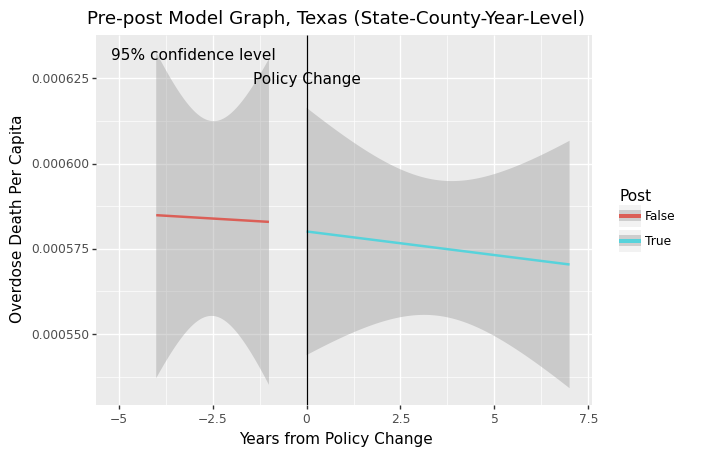

<ggplot: (165983275475)>

In [15]:
# TX - Jan 2007
pre_TX = (ggplot(data[data['STATE'] == 'Texas'], aes(x = 'YearDiff_TX', y='OverdoseProp', color = 'Post')) +
        geom_smooth(method = 'lm', level = 0.95) + 
        geom_vline(xintercept=0, show_legend = 'Policy Change') +
        annotate('text', x = 0, y = 0.000625, label='Policy Change') + 
        annotate('text', x = -3, y = 0.000632, label='95% confidence level') +
        labs(title="Pre-post Model Graph, Texas (State-County-Year-Level)") + 
        xlab('Years from Policy Change') + 
        ylab('Overdose Death Per Capita') + 
        xlim(-5, 7)
)
pre_TX

In [16]:
ggsave(plot = pre_TX, filename = 'TX_pre_overdose', path = "C:/Users/renha/Desktop/graph")

C:\Users\renha\anaconda3\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\renha\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/renha/Desktop/graph\TX_pre_overdose


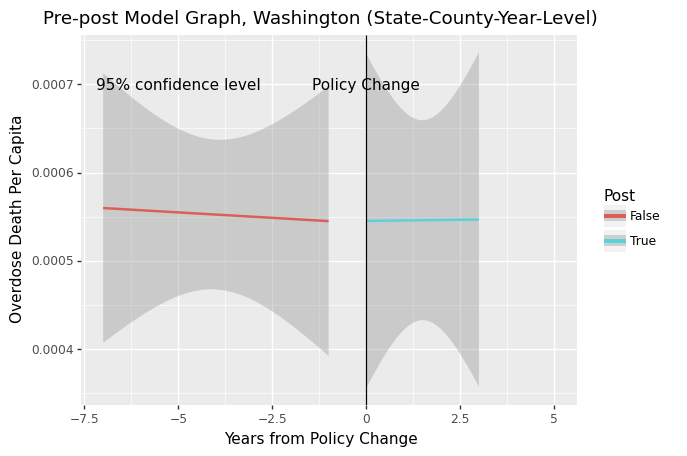

<ggplot: (165587571749)>

In [18]:
# WA - Jan 2012
pre_WA = (ggplot(data[data['STATE'] == 'Washington'], aes(x = 'YearDiff_WA', y='OverdoseProp', color = 'Post')) +
        geom_smooth(method = 'lm', level = 0.90) + 
        geom_vline(xintercept=0, show_legend = 'Policy Change') +
        annotate('text', x = 0, y = 0.0007, label='Policy Change') + 
        annotate('text', x = -5, y = 0.0007, label='95% confidence level') +
        labs(title="Pre-post Model Graph, Washington (State-County-Year-Level)") + 
        xlab('Years from Policy Change') + 
        ylab('Overdose Death Per Capita') + 
        xlim(-7, 5)
)
pre_WA

In [19]:
ggsave(plot = pre_WA, filename = 'WA_pre_overdose', path = "C:/Users/renha/Desktop/graph")

C:\Users\renha\anaconda3\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\renha\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/renha/Desktop/graph\WA_pre_overdose


## Difference in difference analysis

In [20]:
# FL - Feb 2010
# ['LA', 'MS', 'SC']
nearFL = data[data['STATE'].isin(['Louisiana', 'Mississippi', 'South Carolina'])].copy()
nearFL['STATE'] = "NearbyStates"
mergedFL = data[data['STATE'] == 'Florida'].append(nearFL, ignore_index = True)

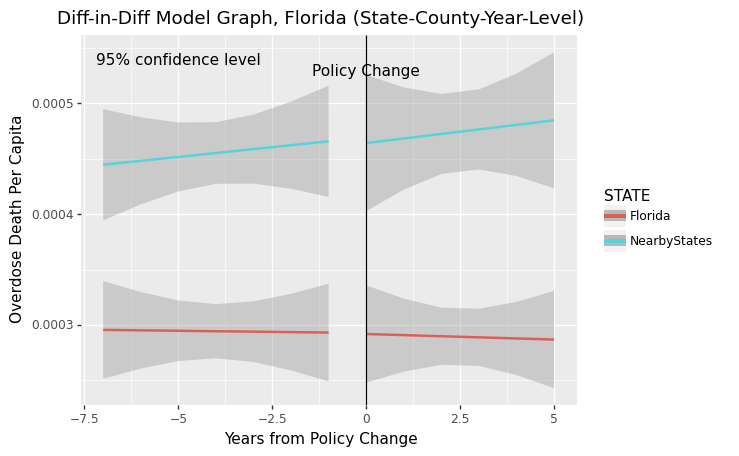

<ggplot: (165587733827)>

In [21]:
diff_FL = (ggplot(mergedFL, aes(y='OverdoseProp', color = 'STATE')) +
        geom_smooth(mergedFL[(mergedFL['YEAR'] < 2010)], aes(x = 'YearDiff_FL'), method = 'lm', level = 0.95) + 
        geom_smooth(mergedFL[(mergedFL['YEAR'] >= 2010)], aes(x = 'YearDiff_FL'), method = 'lm', level = 0.95) +
        geom_vline(xintercept=0, show_legend = 'Policy Change') +
        annotate('text', x = 0, y = 0.00053, label='Policy Change') +
        annotate('text', x = -5, y = 0.00054, label='95% confidence level') +
        labs(title="Diff-in-Diff Model Graph, Florida (State-County-Year-Level)") + 
        xlab('Years from Policy Change') + 
        ylab('Overdose Death Per Capita')      
)
diff_FL

In [22]:
ggsave(plot = diff_FL, filename = 'FL_diff_overdose', path = "C:/Users/renha/Desktop/graph")

C:\Users\renha\anaconda3\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\renha\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/renha/Desktop/graph\FL_diff_overdose


In [23]:
# TX - Jan 2007
# ['AR', 'NM', 'KS']

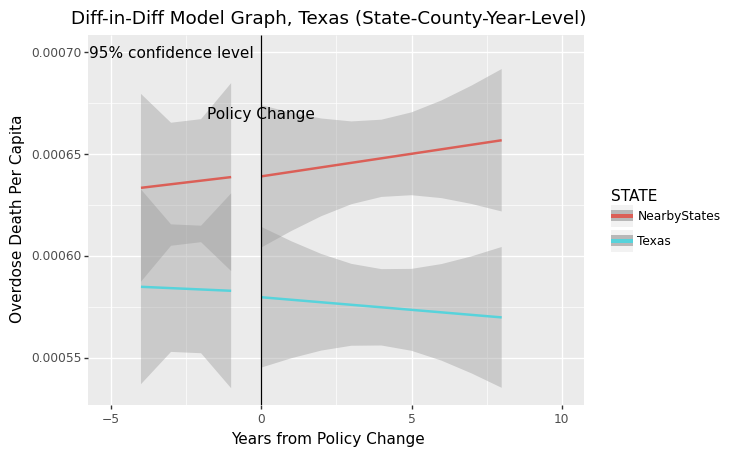

<ggplot: (165587744913)>

In [24]:
diff_TX = (ggplot(mergedTX, aes(y='OverdoseProp', color = 'STATE')) +
        geom_smooth(mergedTX[(mergedTX['YEAR'] < 2007)], aes(x = 'YearDiff_TX'), method = 'lm', level = 0.95) + 
        geom_smooth(mergedTX[(mergedTX['YEAR'] >= 2007)], aes(x = 'YearDiff_TX'), method = 'lm', level = 0.95) +
        geom_vline(xintercept=0, show_legend = 'Policy Change') +
        annotate('text', x = 0, y = 0.00067, label='Policy Change') +
        annotate('text', x = -3, y = 0.0007, label='95% confidence level') +
        labs(title="Diff-in-Diff Model Graph, Texas (State-County-Year-Level)") + 
        xlab('Years from Policy Change') + 
        ylab('Overdose Death Per Capita') +
        xlim(-5, 10)
)
diff_TX

In [25]:
ggsave(plot = diff_TX, filename = 'TX_diff_overdose', path = "C:/Users/renha/Desktop/graph")

C:\Users\renha\anaconda3\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\renha\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/renha/Desktop/graph\TX_diff_overdose


In [26]:
# WA - Jan 2012
# ['CO', 'OR', 'CA']
nearWA = data[data['STATE'].isin(['Colorado', 'Oregon', 'California'])].copy()
nearWA['STATE'] = "NearbyStates"
mergedWA = data[data['STATE'] == 'Washington'].append(nearWA, ignore_index = True)

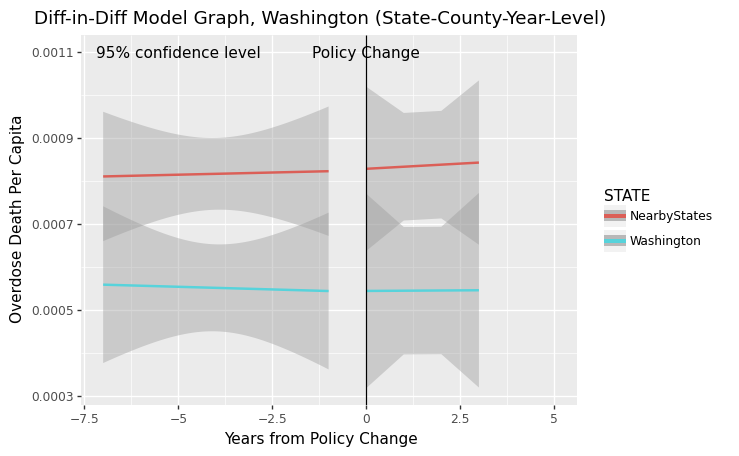

<ggplot: (165587690225)>

In [27]:
diff_WA = (ggplot(mergedWA, aes(y='OverdoseProp', color = 'STATE')) +
        geom_smooth(mergedWA[(mergedWA['YEAR'] < 2012)], aes(x = 'YearDiff_WA'), method = 'lm') + 
        geom_smooth(mergedWA[(mergedWA['YEAR'] >= 2012)], aes(x = 'YearDiff_WA'), method = 'lm') +
        geom_vline(xintercept=0, show_legend = 'Policy Change') +
        annotate('text', x = 0, y = 0.0011, label='Policy Change') +
        annotate('text', x = -5, y = 0.0011, label='95% confidence level') +
        labs(title="Diff-in-Diff Model Graph, Washington (State-County-Year-Level)") + 
        xlab('Years from Policy Change') + 
        ylab('Overdose Death Per Capita') + 
        xlim(-7, 5)
)
diff_WA

In [28]:
ggsave(plot = diff_WA, filename = 'WA_diff_overdose', path = "C:/Users/renha/Desktop/graph")

C:\Users\renha\anaconda3\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\renha\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/renha/Desktop/graph\WA_diff_overdose
